In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/MFCC numpy 20k bee dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

In [5]:
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

train_mfcc_features, train_labels = load_data(TRAINING_DIR)
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)
test_mfcc_features, test_labels = load_data(TEST_DIR)

In [6]:
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

In [7]:
X_train = np.array(train_mfcc_features)
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
X_val = X_val.reshape(X_val.shape[0], -1)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = np.array(encoded_test_labels)

In [8]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [9]:
rf = RandomForestClassifier(random_state=1337)
rf.fit(X_train_normalized, y_train)

RandomForestClassifier(random_state=1337)

In [10]:
y_test_pred = rf.predict(X_test_normalized)

predicted_test_labels = label_encoder.inverse_transform(y_test_pred)

accuracy = accuracy_score(test_labels, predicted_test_labels)
report = classification_report(test_labels, predicted_test_labels)

print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Random Forest Classifier:
Accuracy: 0.9305
Classification Report:
              precision    recall  f1-score   support

       Queen       0.92      0.94      0.93      2000
   Queenless       0.94      0.92      0.93      2000

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



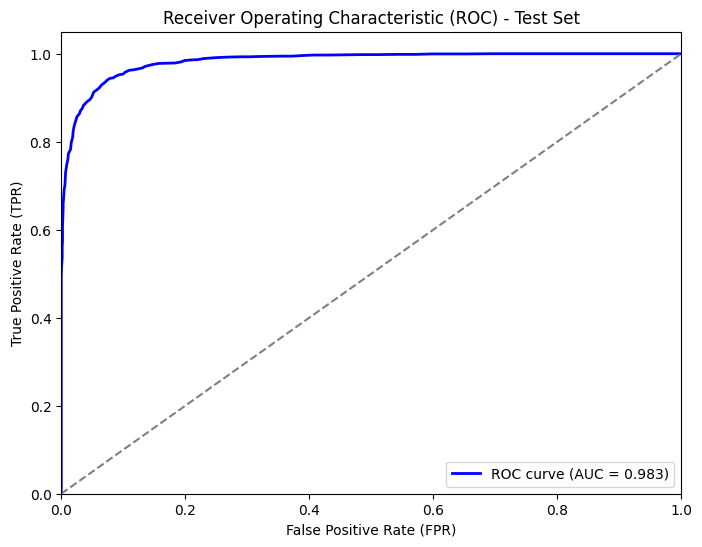

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_test_prob = rf.predict_proba(X_test_normalized)[:, 1]

auc_score = roc_auc_score(y_test, y_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc='lower right')
plt.show()

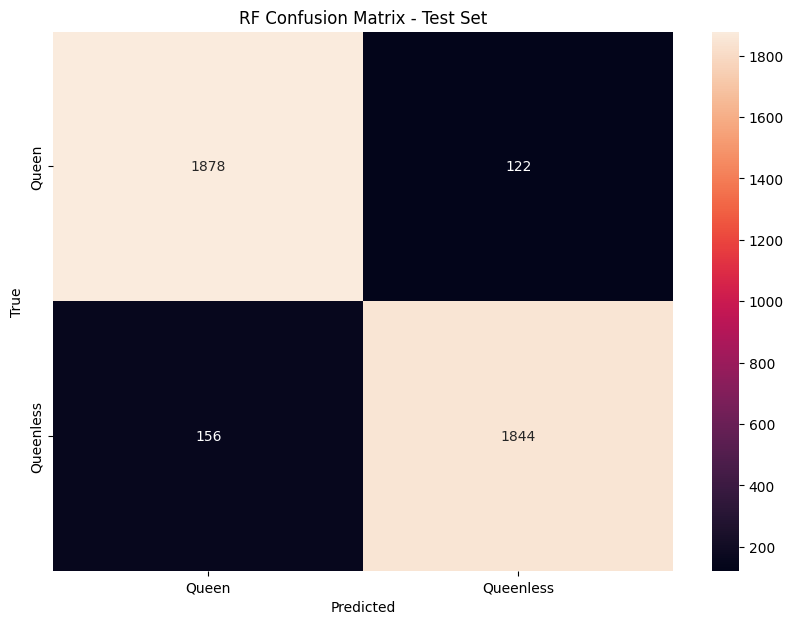

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = label_encoder.classes_

confusion_mat_test = confusion_matrix(test_labels, predicted_test_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_test, annot=True, fmt="", xticklabels=class_labels, yticklabels=class_labels)
plt.title("RF Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [13]:
import pickle

with open('40_mfccs_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)